# K-近邻算法

## 原理
- 计算输入值与训练样本集中数据的距离
- 将距离值降序排列
- 取k个最近的样本标签
- 将样本标签出现频率降序排列
- 输出出现频率最高的样本标签

## 流程
- 搜集数据
- 准备数据
- 分析数据
- 训练算法
- 测试算法
- 使用算法

## 实例1.KNN算法实现
### 准备：导入数据

In [1]:
# 导入必要的库函数
from numpy import *
import operator

### 创建简单的训练数据集

In [4]:
def create_simple_set():
    group = array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.1], [0.0, 0.0]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [5]:
group, labels = create_simple_set()

In [6]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0.1],
       [0. , 0. ]])

In [7]:
group.shape

(4, 2)

In [8]:
labels

['A', 'A', 'B', 'B']

### 建立KNN分类算法
- 1.输入数据与数据集对齐
- 2.点坐标执行相减、平方、累加和开方运算
- 3.升序排列，找出距离较小值
- 4.进行k次循环，将对应标签值传入、标签值出现次数获取并排序、降序排列并输出第一个值

In [9]:
def classify0(inputX, dataset, labels, k):
    # 保证输入与数据集对齐
    datasize = dataset.shape[0]
    
    # 计算距离
    diffmat = tile(inputX, (datasize, 1)) - dataset
    sqmat = diffmat ** 2
    sqdist = sqmat.sum(axis=1)
    distance = sqdist ** 0.5
    
    # 排序,用argsort()
    sortdistance = distance.argsort()
    
    # 创建空字典（用于放置排序后的标签）
    classcount = {}
    
    # 选择距离最小的K个点
    for i in range(k):
        votelabel = labels[sortdistance[i]]
        # 选取排序后对应的标签进行次数统计
        classcount[votelabel] = classcount.get(votelabel, 0) + 1
    # 对统计结果进行降序排列
    sortedclasscount = sorted(classcount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedclasscount[0][0]

In [10]:
classify0([1.0, 1.1], group, labels, 3)

'A'

In [11]:
classify0([0, 0], group, labels, 3)

'B'

In [12]:
classify0([0.5, 0.5], group, labels, 3)

'B'

## 约会网站的配对效果

### 准备数据：文本解析

In [13]:
def file2matrix(filename):
    # find the numbers of file rows
    fr = open(filename)
    arraylines = fr.readlines()
    numberline = len(arraylines)
    
    # create a zero matrix
    zeromatrix = zeros((numberline, 3))
    
    # analy data and get a list
    classlabelvector = []
    index = 0
    for line in arraylines:
        line = line.strip()
        listfromline = line.split("\t")
        zeromatrix[index, :] = listfromline[0:3]
        classlabelvector.append(int(listfromline[-1]))
        index += 1
    return zeromatrix, classlabelvector

In [15]:
file2matrix('datingTestSet2.txt')

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]),
 [3,
  2,
  1,
  1,
  1,
  1,
  3,
  3,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  3,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  3,
  3,
  1,
  2,
  3,
  1,
  3,
  1,
  2,
  2,
  1,
  1,
  3,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  1,
  3,
  1,
  2,
  3,
  3,
  2,
  3,
  3,
  1,
  2,
  3,
  2,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  3,
  3,
  1,
  3,


In [16]:
def file2matrix1(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [17]:
datingmat, datinglabels = file2matrix1('datingTestSet.txt')

ValueError: invalid literal for int() with base 10: 'largeDoses'

73731, 11.830315, class1
32636, 7.124246, class3
36243, 12.332936, class3
26151, 12.427887, class3
10003, 3.196124, class2
41897, 2.122689, class1
55017, 3.962125, class1
24049, 8.595299, class3
72491, 12.198503, class1
25878, 4.691450, class2
11121, 7.178040, class2
40221, 7.628149, class3
75488, 18.272377, class1
36073, 10.854893, class3
19095, 11.720617, class3
34406, 8.299395, class3
36441, 2.443936, class1
72453, 11.905402, class1
9043, 1.192838, class2
19704, 14.284076, class3
13808, -0.312663, class2
35248, 4.740597, class1
10956, 6.012894, class2
1528, 4.132587, class2
11597, 5.757676, class2
8281, -0.867244, class2
37997, 9.763725, class3
56897, 2.147017, class1
51877, 4.434111, class1
31028, 8.686397, class3
72673, 11.926643, class1
54053, 1.233025, class1
35395, 13.398162, class3
74294, 12.901252, class1
12460, 0.056328, class2
9218, 4.277201, class2
36004, 11.478688, class3
32059, 11.633226, class3
13113, 3.394444, class2
39508, 9.725560, class3
66423, 9.430090, class1
7141

12467, -0.587779, class2
17197, 1.849826, class2
31541, 0.434759, class1
14812, 5.921103, class2
35438, 8.377800, class3
25863, 8.761457, class3
73446, 11.249540, class1
54126, 3.098425, class1
10300, 4.754637, class2
64073, 12.288805, class1
25397, 2.953890, class1
27089, 3.021390, class1
13852, 4.831137, class2
34977, 7.553744, class3
7234, -1.175753, class2
37623, 0.198297, class1
42856, 9.773398, class3
66693, 12.804086, class1
59145, 6.769590, class1
14882, 5.066232, class2
41762, 3.112946, class1
67734, 8.839750, class1
19602, 10.500414, class3
25360, 10.213780, class3
55124, 5.140259, class1
30819, 8.805606, class3
38484, 11.886055, class3
68294, 8.574405, class1
59248, 9.195167, class1
73616, 7.460637, class1
65998, 13.058282, class1
35078, 13.720785, class3
35901, 10.551374, class3
63079, 3.070070, class1
74412, 8.999870, class1
71903, 11.030173, class1
36158, 2.872800, class1
10686, 2.037963, class2
48756, 4.978340, class1
37472, 12.332473, class3
66992, 7.964239, class1
603,

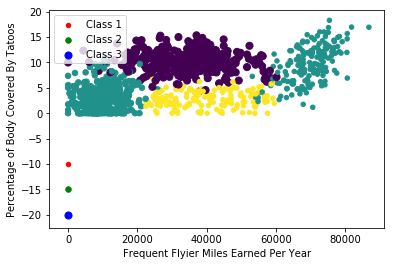

In [18]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


n = 1000 #number of points to create
xcord = zeros((n))
ycord = zeros((n))
markers =[]
colors =[]
fw = open('testSet.txt','w')
for i in range(n):
    [r0,r1] = random.standard_normal(2)
    myClass = random.uniform(0,1)
    if (myClass <= 0.16):
        fFlyer = random.uniform(22000, 60000)
        tats = 3 + 1.6*r1
        markers.append(20)
        colors.append(2.1)
        classLabel = 1 #'didntLike'
        print (("%d, %f, class1") % (fFlyer, tats))
    elif ((myClass > 0.16) and (myClass <= 0.33)):
        fFlyer = 6000*r0 + 70000
        tats = 10 + 3*r1 + 2*r0
        markers.append(20)
        colors.append(1.1)
        classLabel = 1 #'didntLike'
        print (("%d, %f, class1") % (fFlyer, tats))
    elif ((myClass > 0.33) and (myClass <= 0.66)):
        fFlyer = 5000*r0 + 10000
        tats = 3 + 2.8*r1
        markers.append(30)
        colors.append(1.1)
        classLabel = 2 #'smallDoses'
        print (("%d, %f, class2") % (fFlyer, tats))
    else:
        fFlyer = 10000*r0 + 35000
        tats = 10 + 2.0*r1
        markers.append(50)
        colors.append(0.1)
        classLabel = 3 #'largeDoses'
        print (("%d, %f, class3") % (fFlyer, tats))
    if (tats < 0): tats =0
    if (fFlyer < 0): fFlyer =0
    xcord[i] = fFlyer; ycord[i]=tats
    fw.write("%d\t%f\t%f\t%d\n" % (fFlyer, tats, random.uniform(0.0, 1.7), classLabel))

fw.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord,ycord, c=colors, s=markers)
type1 = ax.scatter([-10], [-10], s=20, c='red')
type2 = ax.scatter([-10], [-15], s=30, c='green')
type3 = ax.scatter([-10], [-20], s=50, c='blue')
ax.legend([type1, type2, type3], ["Class 1", "Class 2", "Class 3"], loc=2)
#ax.axis([-5000,100000,-2,25])
plt.xlabel('Frequent Flyier Miles Earned Per Year')
plt.ylabel('Percentage of Body Covered By Tatoos')
plt.show()